# Ejercicio: Clasificación de Flores Iris con Scikit-Learn

### Objetivo
Construir un modelo de Machine Learning para clasificar flores de la base de
datos Iris usando scikit-learn.

### Descripción
El conjunto de datos Iris contiene información sobre 150 flores de tres especies diferentes (setosa, versicolor y virginica). Cada flor tiene cuatro características:
- Largo del sépalo (cm)
- Ancho del sépalo (cm)
- Largo del pétalo (cm)
- Ancho del pétalo (cm)

El objetivo es entrenar un modelo de clasificación que pueda predecir la especie de una flor en función de sus características.

## Tareas
Crea un libro de Jupyter y ve implementando los siguientes pasos del ejercicio.
Usa bloques de documentación (Markdown) junto con bloques de código. Ve
paso a paso.

1. Carga del conjunto de datos.
Utiliza datasets.load_iris() de scikit-learn para cargar los datos.

In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
#Crea el dataframe con los datos y los nombres de las columnas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#Añade la columna de etiquetas
df['target'] = iris.target
# Añade la columna con el nombre de la especie
df['especies'] = df['target'].apply(lambda x: iris.target_names[x])


2. Exploración de datos
- Muestra los primeros registros de las características y etiquetas.
- ¿Cuántas muestras hay por cada especie?

In [2]:
print("Los primeros registros:")
print(df.head())
print()
print("Las etiquetas:")
print(df.columns)
print()
print("Número de muestras por especie:")
print(df.groupby('especies').size())

Los primeros registros:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target especies  
0       0   setosa  
1       0   setosa  
2       0   setosa  
3       0   setosa  
4       0   setosa  

Las etiquetas:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'especies'],
      dtype='object')

Número de muestras por especie:
especies
setosa        50
versicolor    50
virginica     50
dtype: int64


3. División del conjunto de datos

Divide los datos en conjunto de entrenamiento (80%) y conjunto de
prueba (20%) usando train_test_split()

In [3]:
# Separar variables
X = df[['petal length (cm)']]
y = df['especies']

In [5]:
# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

4. Entrenamiento de un modelo
- Entrena un clasificador como DecisionTreeClassifier o KNeighborsClassifier.
- Ajusta el modelo con el conjunto de entrenamiento


In [6]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
y_pred_dt = modelo.predict(X_test)

5. Evaluación del modelo
- Predice la especie de las flores en el conjunto de prueba.
- Calcula la precisión del modelo con accuracy_score() .

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Precisión:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Precisión: 0.9333333333333333
[[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



6. Predicción con datos nuevos
- Introduce un nuevo conjunto de valores (ejemplo manual) y predice la
especie de la flor.

In [11]:
import numpy as np
new_values = np.array([[4.7]])
prediction = modelo.predict(new_values)
print("La especie predicha es:", {prediction[0]})

La especie predicha es: {np.str_('versicolor')}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Extras (Opcional)
- Visualiza la distribución de los datos usando matplotlib o seaborn .
- Prueba otros modelos como RandomForestClassifier o SVC y compara los
resultados.

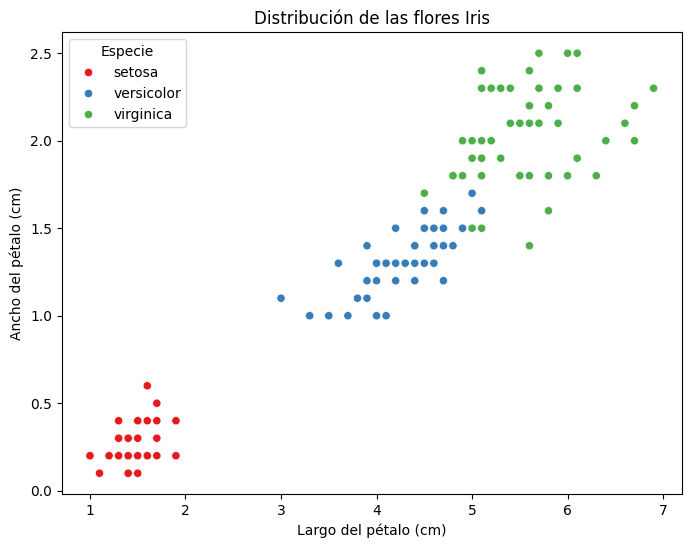

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="especies", palette="Set1")
plt.title("Distribución de las flores Iris")
plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.legend(title="Especie")
plt.show()

In [14]:
#Probando con random forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("Precisión con Random Forest:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Precisión con Random Forest: 0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

